# Final homework

*Akademia Leona Kozminskiego*

#### Descriptive Statistics

*Prof.* Katarzyna Piotrowska 
<br>
*Student:* Alejandro Guzmán Rivera (*23-DS*)

**Instructions** <br>

A simple quantitative, explanatory research (for 5: with the theory-based justification of the hypothesis i.e. literature review with references etc.). At least one variable on the qualitative level of measurement (categorical or ordinal) and one on the quantitative (interval or ratio) level of measurement.<br>

1. Research question and hypothesis (if applicable) – is the research descriptive or explanatory?
2. Variables’ definitions (conceptualisation)
3. Operationalisation (variables’ indicators, their levels and levels of measurement)
4. Subject of the study: observation unit
5. Data collection procedure
6. Data analysis <br>
  6.1. Sample description <br>
  6.2. Bivariate and/or multivariate analyses (at least two different) with the justification of the choice of
    the method and interpretation of the results <br>
  6.3. The purpose of use descriptive statistics (sample description, the answer to research question, other) <br>
10. Conclusions/discussion

#### Relevant libraries

In [1]:
# Tables creation
from tabulate import tabulate

# Tables manipulation and numbers formatting
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format

# Statistical analysis
from matplotlib import pyplot as plt
from matplotlib import figure
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf  

# Graphics creation and aesthetics
import seaborn as sns
sns.set()


## 1. Research question

* What is the impact of crops production in Poland in Greenhouse Gasses (GHG), specifically Nitrous Oxide through the period 1961-2019? 

## 2. Hypothesis

* There is a positive correlation between Cereals, Roots and Tubers and Potatoes production and Nitrous Oxide (N2O) emissions in Poland during the period 1971 to 2018.

## 3. Variables definition and operationalisation

In [2]:
variables_defi = {"Variable": ["y", "x1", "x2"],
                  "Name": ["N2O emissions", "Cereals", "Potatoes"], 
                  "Level": ["Ratio", "Ratio", "Ratio"]
                }
print(tabulate(variables_defi, headers="keys", tablefmt="fancy_grid", stralign="center"))

╒════════════╤═══════════════╤═════════╕
│  Variable  │     Name      │  Level  │
╞════════════╪═══════════════╪═════════╡
│     y      │ N2O emissions │  Ratio  │
├────────────┼───────────────┼─────────┤
│     x1     │    Cereals    │  Ratio  │
├────────────┼───────────────┼─────────┤
│     x2     │   Potatoes    │  Ratio  │
╘════════════╧═══════════════╧═════════╛


## 4. Subject of study

Nitrous Oxide (N2O) emissions according to crops production (thousandmetric tons of CO2 equivalent).

## 5. Data collection procedure

### 5.1 Characteristics and description of the crops dataset

According to Wąs *et al.* (2020), the level of GHG emissions depends on the type of agricultural land utilisation (type of crops) and the level of production intensity and applied techniques. About Poland case, Agriculture is the largest emitter of N2O in the country, producing 78.0% of this GHG. Nearly 85.8% of N2O emissions in agriculture come from the section of agricultural soils.

The crops production dataset was obtained originally from *data.world*. That dataset was taken in first place from the Food and Agriculture Organization of the United Nations (FAO) which contains statistics of 173 farm products around the world. The dataset was filtered using SQL by area code, in this case "173", that corresponds to Poland. <br>

The first descriptive analysis showed that, the most important crops in terms of production were: Cereals (in general), Potatoes and Roots and Tubers. However, the crop production dataset presented, that at least for this case, columns names of "Potatoes" and "Roots and Tubers" have exactly the same values. This odd situation requires further research but in order to continue the analysis and due to the amount of the production of both (highly superior compared to other crops), "Roots and Tubers" variable was discarded.

The Nitrous Oxide (N2O) emissions dataset was obtained from The World Bank (2022) website . This dataset contains information from 1971 to 2018. To make the dataset symetric, this period was chosen also for crops dataset. 

After a first analysis of the crops dataset, the most prolific crops products produced in Poland between 1971 and 2018 are:

1. Cereals:                                 1,583,068,952.00
2. Potatoes:                                1,334,122,051.00

Moren information about these production can be found in the cells below.


In [3]:
# Import the data set from local

data_crops = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\2019-1961-crop-production-in-Poland-QueryResult.csv")

### 5.2 Crop production dataset cleaning

In [4]:
# Getting a sample of the NAN values
data_crops.isna().sum()
data_crops.isna().T.head().T.head(3)

,area_code,area,item_code,item,element_code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False


In [17]:
# Replace NAN with 0
data_crops.replace(np.nan, 0)

# Describe the data_crops dataset
dataCropsGrouped = data_crops.groupby(["item"]).sum()

#Group the data_crops dataset by item
dataCropsGrouped = dataCropsGrouped.drop(columns=["area_code", "item_code", "element_code"])

# dataCropsGrouped set basic  information
dataCropsGrouped
dataCropsGrouped.head()
dataCropsGrouped.T.head().T.head(3)

,y1971,y1972,y1973,y1974,y1975
item,,,,,
"Almonds, with shell",0.00,0.00,0.00,0.00,0.00
"Anise, badian, fennel, coriander","3,400.00",0.00,0.00,0.00,0.00
Apples,"563,200.00","558,500.00","682,500.00","594,300.00","840,722.00"


In [7]:
# Check for the most important crops from dataCropsGrouped dataset

dataCropsGroupedSum = dataCropsGrouped.sum(axis=1)
print(dataCropsGroupedSum.sort_values(ascending=False).head())
cleanDataCrops = dataCropsGroupedSum.loc[~(dataCropsGroupedSum == 0)]

item
Cereals, Total            1,583,068,952.00
Roots and Tubers, Total   1,334,122,051.00
Potatoes                  1,334,122,051.00
Sugar Crops Primary         682,033,347.00
Sugar beet                  682,033,347.00
dtype: float64


## 6. Data Analysis

In [10]:
# Removing all rows with 0 values from the dataCropsCleaned dataset

dataCropsCleaned = dataCropsGrouped.loc[~(dataCropsGrouped == 0).all(axis=1)]

# Transpose the dataCropsCleaned dataset

dataCropsTransposed = dataCropsCleaned.transpose()

In [18]:
# Import dataset with three variables: N2O emissions, Cereals and Potatoes production
cropsNitrox_df = pd.read_csv(r"C:\Users\USER\Documents\Desarrollador\PYTHON\2021-Python-exercises\statistics-projects\2022-02-18-tarea-phd-statistics\CropsNitrox.csv")

cropsNitrox_df.head(5)

,Year,Nitrous.oxide.emissions.,Cereals.Total,Potatoes
0,1971,"37,691.04",28346210,42619605
1,1972,"38,576.71",28911646,51574900
2,1973,"43,345.13",30132506,54800486
3,1974,"45,306.19",31093909,51383477
4,1975,"46,495.35",27446629,49189801


In [99]:
# Descriptive Statistics

cropsNitrox_Stats = cropsNitrox_df.loc[:,cropsNitrox_df.columns != "Year"]
print(cropsNitrox_Stats.describe())
print(cropsNitrox_Stats.agg(
  {
    "Nitrous.oxide.emissions.": 
      ["median", "skew"],
    "Cereals.Total": 
      ["median", "skew"],
    "Potatoes": 
      ["median", "skew"]
  }
))

       Nitrous.oxide.emissions.  Cereals.Total      Potatoes
count                     48.00          48.00         48.00
mean                  30,026.39  32,980,603.17 27,794,209.40
std                    8,996.23   3,639,354.81 15,377,540.62
min                   20,500.00  25,234,198.00  6,824,231.00
25%                   23,230.00  30,170,408.00 11,184,625.75
50%                   24,595.00  34,084,246.00 27,010,621.50
75%                   38,085.51  35,616,846.50 39,051,279.75
max                   46,495.35  39,568,956.00 54,800,486.00
        Nitrous.oxide.emissions.  Cereals.Total      Potatoes
median                 24,595.00  34,084,246.00 27,010,621.50
skew                        0.60          -0.25          0.16


It is observed that none of the variables studied: Cereals (x1) and Potatoes (x2) present extreme data. This is also not the case for Nitrous Oxide (N2O) emissions. The information suggests that the data is spread in a homogenous way.

In the case of N2O and Potatoes the data is slighted skew to the left insted of Cereals which is skewed to the right. Standard deviaton also susggests that for Cereals the data is not that widely spread, on the contrary of N2O and Potatoes.

### Plots

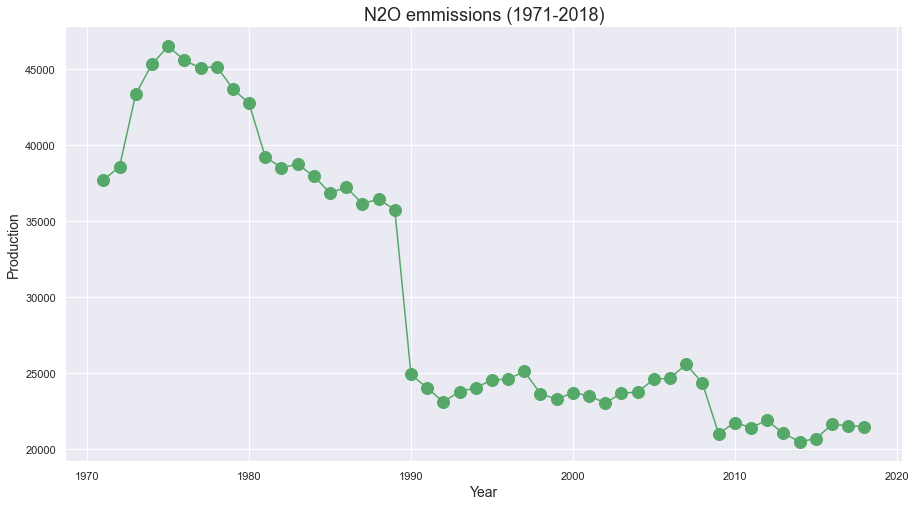

In [13]:
# Plot N2O

plt.figure(figsize=(15,8))
plt.xlabel("Year", fontsize = 14)
plt.ylabel("Production", fontsize= 14)
plt.title("N2O emmissions (1971-2018)", fontsize=18)

plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Nitrous.oxide.emissions."], "g-o", markersize=12)
plt.show();

The Nitrous Oxide (N2O) dataset was gathered from *databank.worldbank.org*. Those datasets were filtered using the tools provided by the website itself (using SQL) to include only Poland from the period from 1971 to 2018.

It is observed an interesting drop in N2O emissions after 1989, so it was decided to cut the dataset from that date in order to analyze the data after that 1989. According to Kozyra *et al.*, (2015), the decrease in GHG emissions from agricultural activities in this period was mainly a result of economic transformation in Poland. Besides, the drop was strongly correlated with a significant limitation in the use of mineral and organic fertilizers.

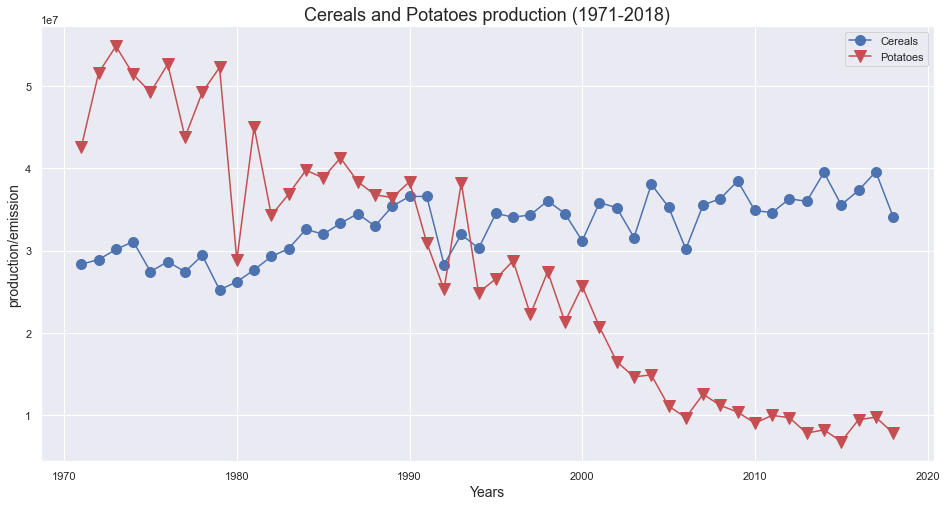

In [14]:
# Base of the plot 
plt.figure(figsize=(16,8))
plt.xlabel("Years", fontsize= 14)
plt.ylabel("production/emission", fontsize= 14)
plt.title("Cereals and Potatoes production (1971-2018)", fontsize=18)

# Plot itself
plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Cereals.Total"], "b-o", markersize=10, label="Cereals")
plt.plot(cropsNitrox_df["Year"], cropsNitrox_df["Potatoes"], 'r-v', markersize = 12, label = "Potatoes")

plt.legend()
plt.show();


A homogeneous pattern of cereal production can be observed, however, the case of potatoes is different since, with this product, the decrease has been sustained over time.

In [45]:
onitrox =  cropsNitrox_df.copy()
onitrox = onitrox.iloc[19:]
onitrox.head(3)


,Year,Nitrous.oxide.emissions.,Cereals.Total,Potatoes
19,1990,"24,920.00",36577197,38345977
20,1991,"24,010.00",36559688,30938420
21,1992,"23,110.00",28307266,25278166


In [72]:
onitrox.loc[:,cropsNitrox_df.columns != "Year"].describe()

,Nitrous.oxide.emissions.,Cereals.Total,Potatoes
count,29.00,29.00,29.00
mean,"23,132.41","34,908,757.10","17,600,055.72"
std,"1,493.06","2,721,776.65","9,471,555.03"
min,"20,500.00","28,307,266.00","6,824,231.00"
25%,"21,620.00","34,121,557.00","9,729,600.00"
50%,"23,650.00","35,289,159.00","14,676,587.00"
75%,"24,350.00","36,295,275.00","25,278,166.00"
max,"25,570.00","39,568,956.00","38,345,977.00"


#### Barplots

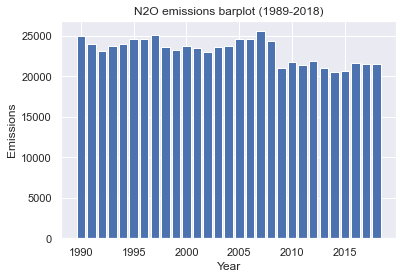

C:\Users\USER\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


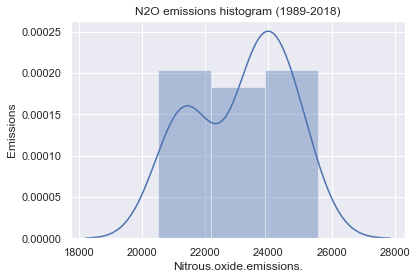

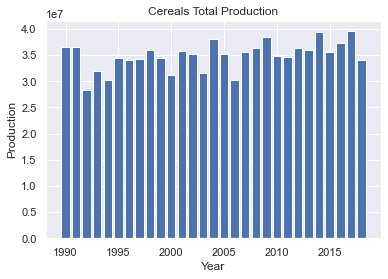

C:\Users\USER\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


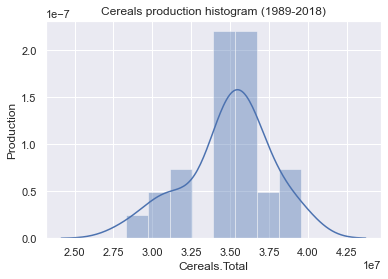

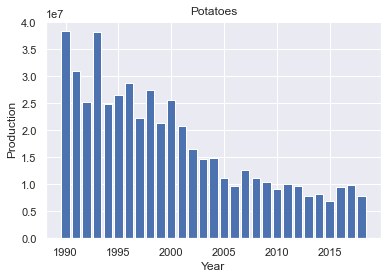

C:\Users\USER\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


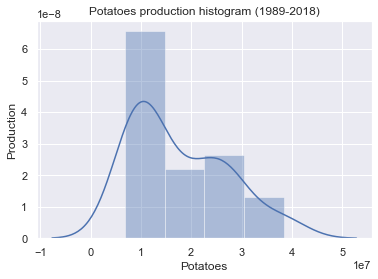

In [60]:
# N20 barplot
plt.title("N2O emissions barplot (1989-2018)")
plt.xlabel("Year")
plt.ylabel("Emissions")
plt.bar(x= onitrox["Year"], height=onitrox["Nitrous.oxide.emissions."]);
plt.show();

# N2O Histogram
plt.title("N2O emissions histogram (1989-2018)")
plt.xlabel("Year")
plt.ylabel("Emissions")
sns.distplot(a=onitrox["Nitrous.oxide.emissions."], hist=True, kde=True, rug=False);
plt.show();

# Cereals production Barplot
plt.title("Cereals Total Production")
plt.xlabel("Year")
plt.ylabel("Production")
plt.bar(x=onitrox["Year"], height=onitrox["Cereals.Total"])
plt.show();

# Cereals Histogram
plt.title("Cereals production histogram (1989-2018)")
plt.xlabel("Year")
plt.ylabel("Production")
sns.distplot(a=onitrox["Cereals.Total"], hist=True, kde=True, rug=False);
plt.show();

# Potatoes production Barplot
plt.title("Potatoes")
plt.xlabel("Year")
plt.ylabel("Production")
plt.bar(x= onitrox["Year"], height=onitrox["Potatoes"])
plt.show();

# Potatoes Histogram
plt.title("Potatoes production histogram (1989-2018)")
plt.xlabel("Year")
plt.ylabel("Production")
sns.distplot(a=onitrox["Potatoes"], hist=True, kde=True, rug=False);
plt.show();

The data presented in the histograms show a strange "not normal" behavior.

#### BoxPlots

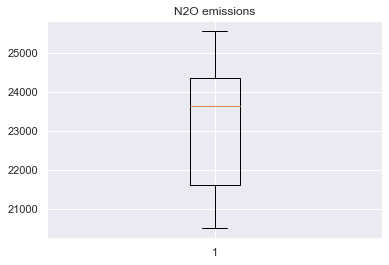

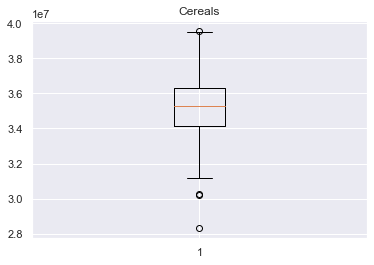

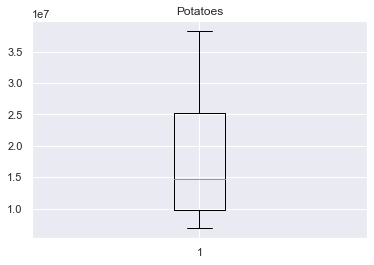

In [63]:
# Nitrous Oxide Emissions Boxplot
plt.title("N2O emissions")
plt.boxplot(onitrox["Nitrous.oxide.emissions."])
plt.show();

# Cereals production boxplot
plt.title("Cereals")
plt.boxplot(onitrox["Cereals.Total"])
plt.show();

# Potatoes production boxplot
plt.title("Potatoes")
plt.boxplot(onitrox["Potatoes"])
plt.show();

Between the three graphs only Cereals shows outliers but the median is aproximately in the middle of all data. In the other cases, the median seems skewed towards the maximum (N2O) or the minimum (Potatoes).

#### Bivariate analysis

##### Scatter plot  and Regression: N2O vs Cereals

In [64]:
y = onitrox["Nitrous.oxide.emissions."].tolist()
x1 = onitrox["Cereals.Total"].tolist()

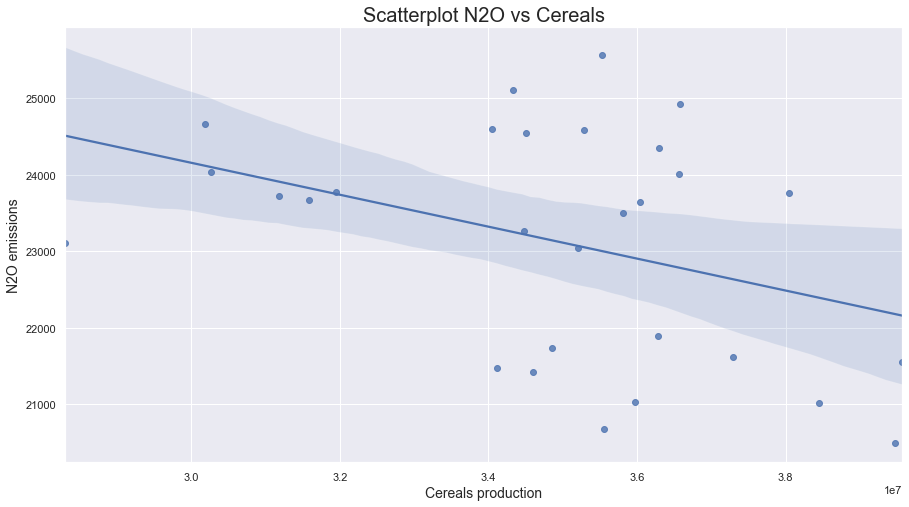

In [65]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Cereals production", fontsize= 14)
plt.ylabel("N2O emissions", fontsize=14)
plt.title("Scatterplot N2O vs Cereals", fontsize=20)

# Scatterplot itself
sns.regplot(x= x1, y= y)
plt.show();

In [66]:
X_cereals = sm.add_constant(x1)
results_cereals = sm.OLS(y,X_cereals).fit()
results_cereals.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     4.577
Date:                Mon, 21 Mar 2022   Prob (F-statistic):             0.0416
Time:                        15:22:52   Log-Likelihood:                -250.32
No. Observations:                  29   AIC:                             504.6
Df Residuals:                      27   BIC:                             507.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.042e+04   3417.778      8.901      0.000    2.34e+04    3.74e+04
x1            -0.0002   9.76e-05     -2.139      0.042      -0.000   -8.55e-06
==============================================================================
Omnibus:                        4.239   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.120   Jarque-Bera (JB):                1.611
Skew:                           0.050   Prob(JB):                        0.447
Kurtosis:                       1.850   Cond. No.                     4.58e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explanation**

* The graph shows that the mayority of the observations seems to be spread away of the line of regression.
* The data seems to have a negative correlation.
* Due P < 0.05, the variable is significative. 
* Due the low value of R<sup>2</sup>, the model seems to be weak the explain the variability of the data.

##### Scatter plot and Regression: N2O vs Potatoes

In [67]:
x3 = onitrox["Potatoes"].tolist()

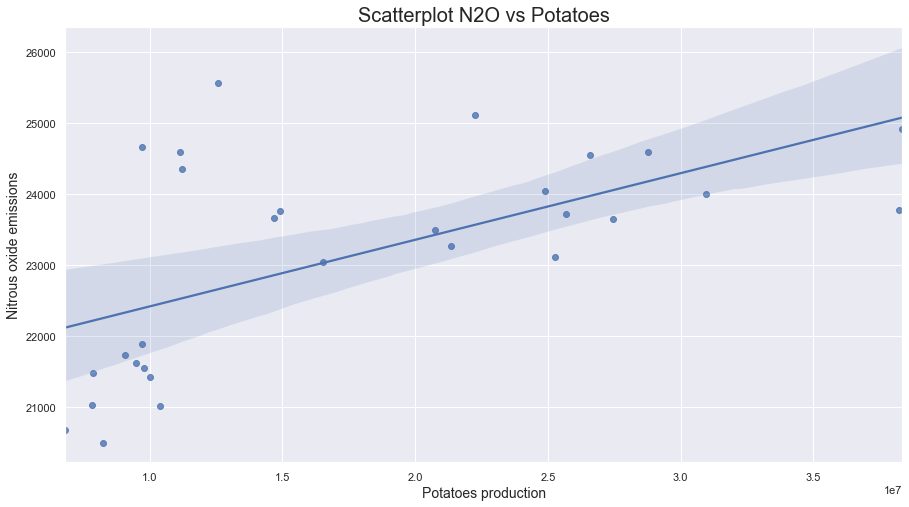

In [69]:
# Base of the plot
plt.figure(figsize=(15,8))
plt.xlabel("Potatoes production", fontsize=14)
plt.ylabel("Nitrous oxide emissions", fontsize=14)
plt.title("Scatterplot N2O vs Potatoes", fontsize=20)

# Scatterplot itself
sns.regplot(x= x3, y= y)
plt.show();

In [70]:
X_Potatoes = sm.add_constant(x3)
results_Potatoes = sm.OLS(y, X_Potatoes).fit()
results_Potatoes.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     14.86
Date:                Mon, 21 Mar 2022   Prob (F-statistic):           0.000650
Time:                        15:23:55   Log-Likelihood:                -246.23
No. Observations:                  29   AIC:                             496.5
Df Residuals:                      27   BIC:                             499.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.148e+04    485.094     44.279      0.000    2.05e+04    2.25e+04
x1          9.392e-05   2.44e-05      3.854      0.001    4.39e-05       0.000
==============================================================================
Omnibus:                        3.811   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.149   Jarque-Bera (JB):                3.116
Skew:                           0.800   Prob(JB):                        0.211
Kurtosis:                       2.862   Cond. No.                     4.26e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Explanation**
* The graph shows that, the mayority of the observations seems to be spread away from the line of regression.
* This data seems to have a positive correlation.
* P < 0.05, so the variable is significative. 
* Due the low value of R<sup>2</sup>, the model seems to be weak the explain the variability of the data.

### 7. Conclusion/Discussion

* It seems that the data, at least with the current variables (Cereals, Roots and Tubers and Potatoes), are not sufficient to explain nitrous oxide emissions. It will be necessary to add more variables to find a model that better explains the problem.

* However, it seems that at least with the variable “Cereals”, they show a positive correlation, however, as mentioned above, given the values of R<sup>2</sup> and adjusted R<sup>2</sup>, the models are weak in explaining the variability.

## References

* Food and Agriculture Organization of the United Nations (FAO). (2018). Crop Production - dataset by agriculture. https://data.world/agriculture/crop-production
* Kozyra, M. ., Borzecka-Walker, R. ., & Borek, R. P. (2015). upport for low carbon agriculture – able to adapt to observed climate change in the perspective of 2030 and 2050 (LCAgri). https://globalresearchalliance.org/country/poland/
* The World Bank. (2022). Nitrous oxide emissions (thousand metric tons of CO2 equivalent) | Data. https://data.worldbank.org/indicator/EN.ATM.NOXE.KT.CE
* Wąs, Adam; Kobus, Paweł; Krupin, Vitaliy; Witajewski-Baltvilks, Jan; Cygler, M. (2020). Asessng Climate Policy Impacts in Poland’s Agriculture -Options Overview- (Issue June). https://climatecake.ios.edu.pl/aktualnosci/news-cake/new-cake-analysis-assessing-climate-policy-impacts-in-polands-agriculture-options-overview/?lang=en